##MSE650A
Quantitative analysis of single phase polycrystalline microstructures:
These process includes the followings steps-\
a. Image processing of grayscale images\
b. Convert the grayscale images to binary images\
c. Image processing binary images (eg, obtain thinned grain boundaries in polycrystalline microstructure, image reconstruction, etc.)\
d. Obtain grain size descriptors: mean intercept length, ASTM grain size number, surface area per unit volume, grain shape, etc.\
e. Obtain intercept length distribution\
f. Obtain grain count using a count of triple points





#Image processing of grayscale images:
* The first step is Image processing of grayscale images. Here we first import the necessary libraries, then import the image file, plot it, turn it into grayscale image.
* After that we obtain the negative of the grayscale image. To fill the gaps in the boundaries of the image we aply reconstruction. The Skeletonization is used to reduce the shape of an object to its skeleton or central line.
* The resulting skeleton provides a simplified representation of the object while preserving its structure.

In [ ]:
#importing necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.ndimage as nd
import matplotlib.image as img
import numpy as np
from skimage import color, filters, morphology, measure, draw, transform
from skimage import feature
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.draw import circle_perimeter
import math

(292, 291, 4) float32 0.0 1.0


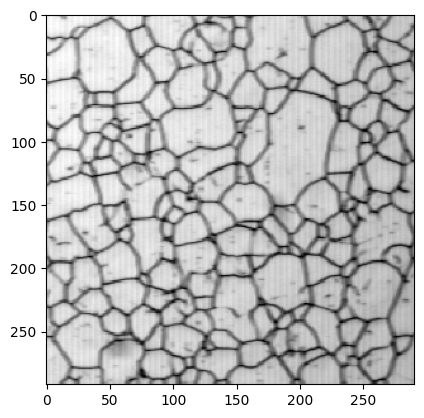

In [ ]:
# Imporing the image
image = plt.imread('/content/polycrystal.png')
print(image.shape, image.dtype, image.min(), image.max())
plt.imshow(image,cmap='gray')

(292, 291) uint8 0 254


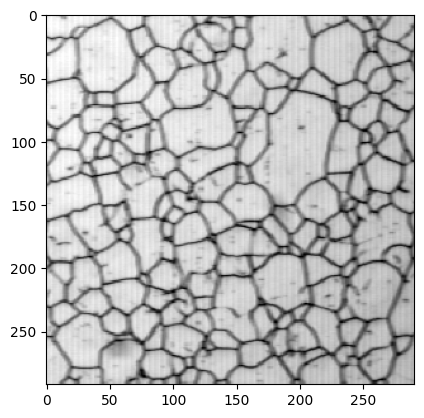

In [ ]:
# Converting the image into grayscale image
image = image[:,:,0:3]
gray = 255*color.rgb2gray(image)
gray = gray.astype(dtype='uint8')
print(gray.shape, gray.dtype, gray.min(), gray.max())
plt.imshow(gray,cmap='gray')

157
[[False False False ... False False  True]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False  True  True]
 [False False False ... False False  True]
 [False False False ... False False  True]]


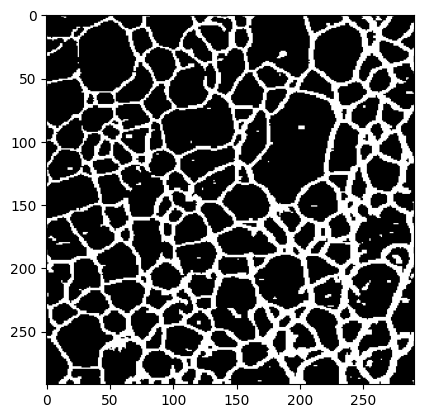

In [ ]:
# Make it negative image
t = filters.threshold_otsu(gray)
print(t)
binary = gray <= t
print(binary)
plt.imshow(binary, cmap='gray')

In [ ]:
# Performing reconstruction on it
selem = np.array([[0,1,0],[1,1,1],[0,1,0]])
print(selem)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


[[False False False ... False False  True]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False  True]]


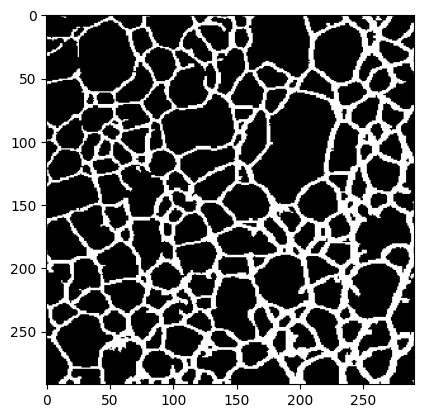

In [ ]:
seed = binary.copy()
seed[1:-1,1:-1] = False
print(seed)
mask = binary.copy()
recons = morphology.reconstruction(seed, mask, method = 'dilation')
plt.imshow(recons, cmap='gray')

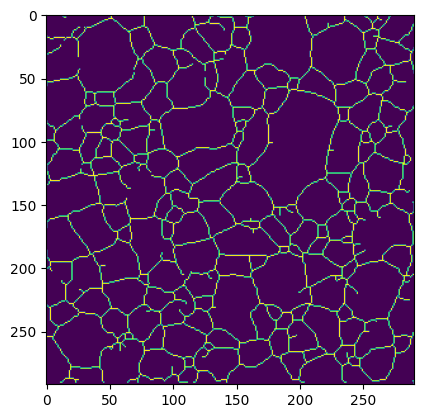

In [ ]:
# Obtain the skeleton of the binary image using thinning
skeleton = morphology.skeletonize(recons)
plt.imshow(skeleton)

 # Calculating grain count using the count of triple points:
* At first obtained the kernels which presents the permutations of triple points.
* Then by morphological erosion and the kernels transversed through the image pixel by pixel.
* The resulting image gives the whole set of triple points. Finally, the triple points are plotted on the image with red dots.
* A list is made consisting the triple points. Its length gives the count for grain.

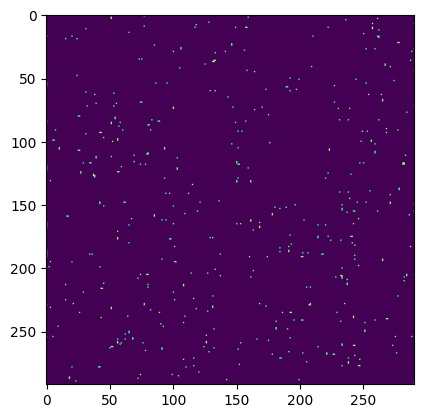

In [ ]:
# Making kernels of desired patterns
kernel1=[[1,1,1],
         [0,1,0],
         [0,0,0]]
kernel2=[[0,1,0],
         [1,1,0],
         [0,1,0]]
kernel3=[[1,0,0],
         [1,1,0],
         [1,0,0]]
kernel4=[[0,1,0],
         [1,1,1],
         [0,0,0]]
kernel5=[[1,0,0],
         [0,1,0],
         [1,0,1]]

kernel6=[[1,0,1],
         [0,1,0],
         [1,0,0]]

kernel7=[[1,0,1],
         [0,1,0],
         [0,0,1]]

kernel8=[[0,0,1],
         [0,1,0],
         [1,0,1]]
kernel9=[[1,0,0],
         [0,1,1],
         [1,0,0]]
kernel10=[[1,0,1],
          [0,1,0],
          [0,1,0]]
kernel11=[[0,0,1],
          [1,1,0],
          [0,0,1]]
kernel12=[[0,1,0],
          [0,1,0],
          [1,0,1]]
kernel13=[[0,1,0],
          [1,1,0],
          [0,0,1]]

kernel14=[[0,1,0],
          [0,1,1],
          [1,0,0]]

kernel15=[[1,0,0],
          [0,1,1],
          [0,1,0]]

kernel16=[[0,0,1],
          [1,1,0],
          [0,1,0]]

# Using erosion to get the triple points set
img1 = morphology.binary_erosion(skeleton, kernel1)
img2 = morphology.binary_erosion(skeleton, kernel2)
img3 = morphology.binary_erosion(skeleton, kernel3)
img4 = morphology.binary_erosion(skeleton, kernel4)
img5 = morphology.binary_erosion(skeleton, kernel5)
img6 = morphology.binary_erosion(skeleton, kernel6)
img7 = morphology.binary_erosion(skeleton, kernel7)
img8 = morphology.binary_erosion(skeleton, kernel8)
img9 = morphology.binary_erosion(skeleton, kernel9)
img10 = morphology.binary_erosion(skeleton, kernel10)
img11 = morphology.binary_erosion(skeleton, kernel11)
img12 = morphology.binary_erosion(skeleton, kernel12)
img13 = morphology.binary_erosion(skeleton, kernel13)
img14 = morphology.binary_erosion(skeleton, kernel14)
img15 = morphology.binary_erosion(skeleton, kernel15)
img16 = morphology.binary_erosion(skeleton, kernel16)

# Using logical operator "or" to get complete set
intersection1 = np.logical_or(img1, img2)
intersection2 = np.logical_or(img3, img4)
intersection3 = np.logical_or(img5, img6)
intersection4 = np.logical_or(img7, img8)
intersection5 = np.logical_or(img9, img10)
intersection6 = np.logical_or(img11, img12)
intersection7 = np.logical_or(img13, img14)
intersection8 = np.logical_or(img15, img16)
result1 = np.logical_or(intersection1,intersection2)
result2 = np.logical_or(intersection3,intersection4)
result3 = np.logical_or(intersection5,intersection6)
result4 = np.logical_or(intersection7,intersection8)
collection1 = np.logical_or(result1, result2)
collection2 = np.logical_or(result3, result4)
intersection = np.logical_or(collection1, collection2)

# Plotting the set on image
plt.imshow(intersection)

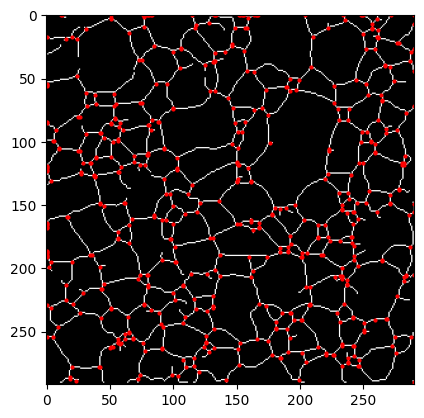

In [ ]:
# Finding coordinates of resulting points in img1
y, x = np.where(intersection)

# Plotting skeleton image
plt.imshow(skeleton, cmap='gray')

# Plotting red circles on resulting points in img1
plt.plot(x, y, 'ro', markersize=2)

# Showing the plot
plt.show()


In [ ]:
# Printing the triple points
points = np.transpose(np.where(intersection))
print(points)

[[  0  11]
 [  0  12]
 [  0  51]
 ...
 [289  23]
 [290 290]
 [291 290]]


In [ ]:
# Printing number of triple points
print("Number of Triple Points: "+str(len(points)))

Number of Triple Points: 533


#Calculation Of Intercept Length:
* Three Grids are drawn in equal distance gap.
* The logical operator and is used to get the interceptings points between grids and boundaries. These points are plotted in the image.
* Calculated the distance between these points which are on the same grid line. These distances give intercept lengths.
* Plotted the lengths on histogram against their frequencies.
* Calculated the Mean Intercept length.

73
3


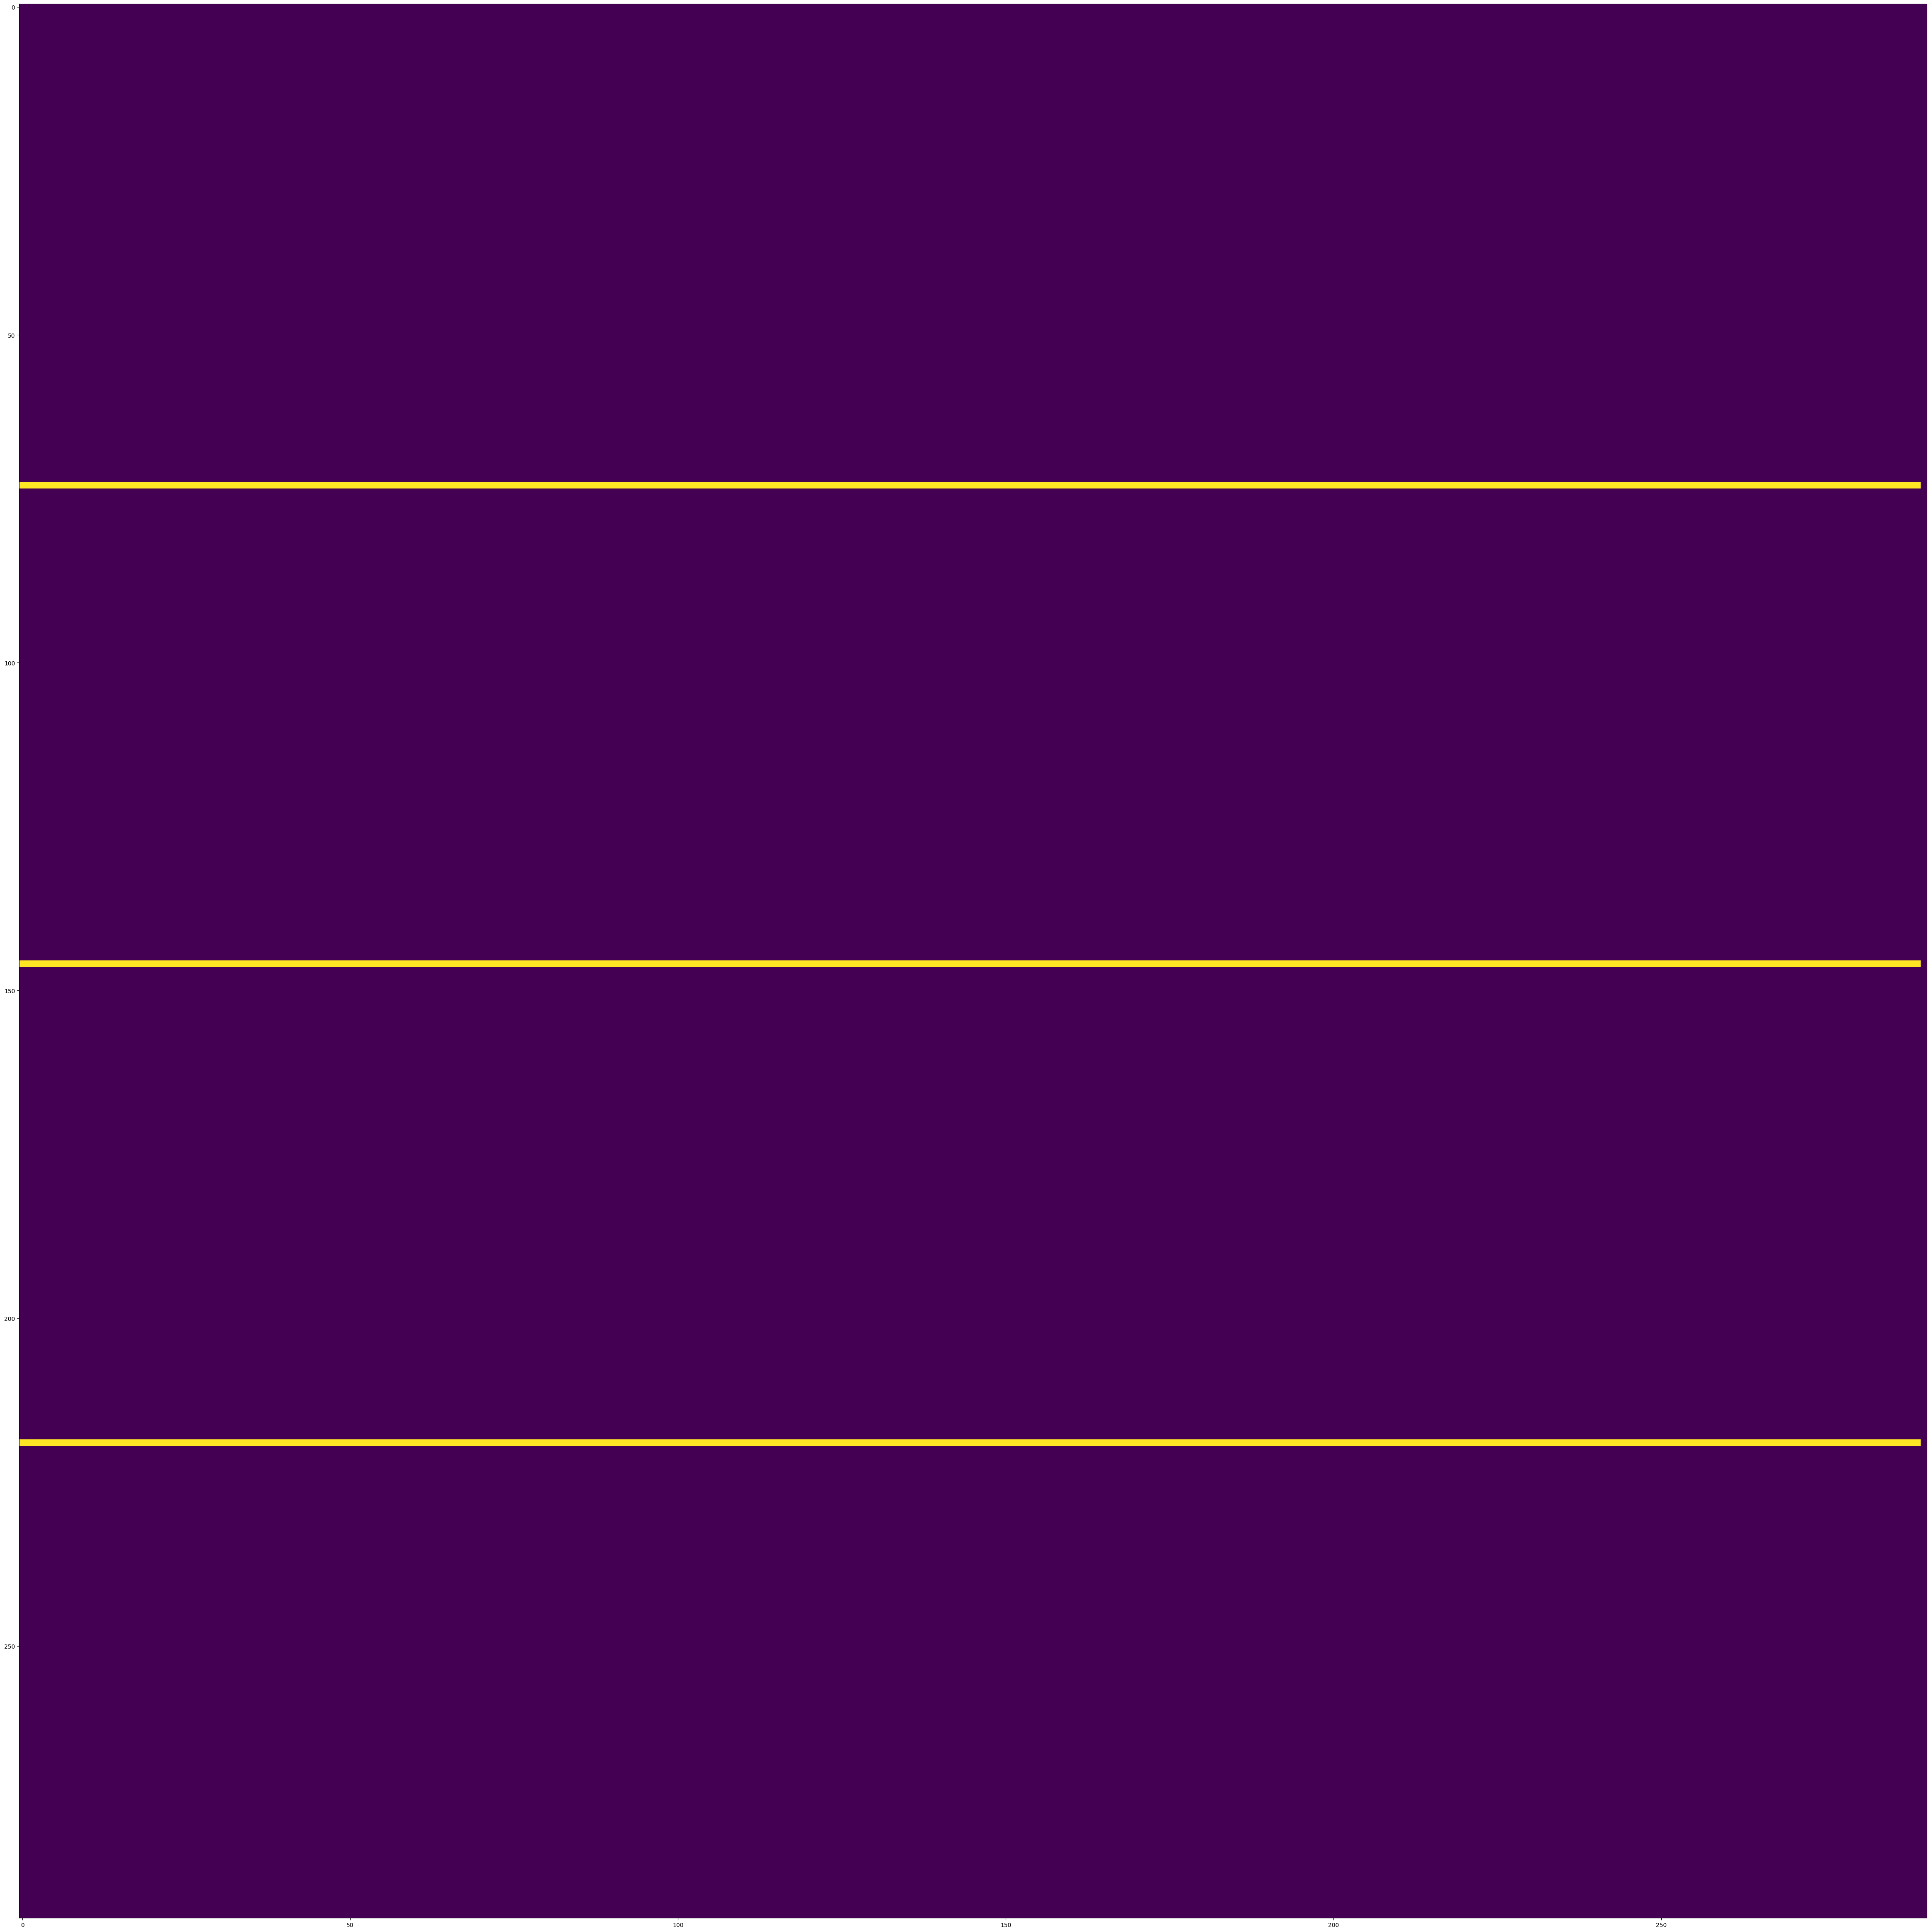

In [ ]:
# Making horizontal grids
grid = np.zeros(recons.shape, dtype = 'bool')
delta = int(np.rint(grid.shape[0]/4))
print(delta)
n = 0
for i in range(delta, grid.shape[0],delta):
    n += 1
    grid[i,0:-1] = True
print(n)
plt.figure(figsize = (60,60))
plt.imshow(grid)

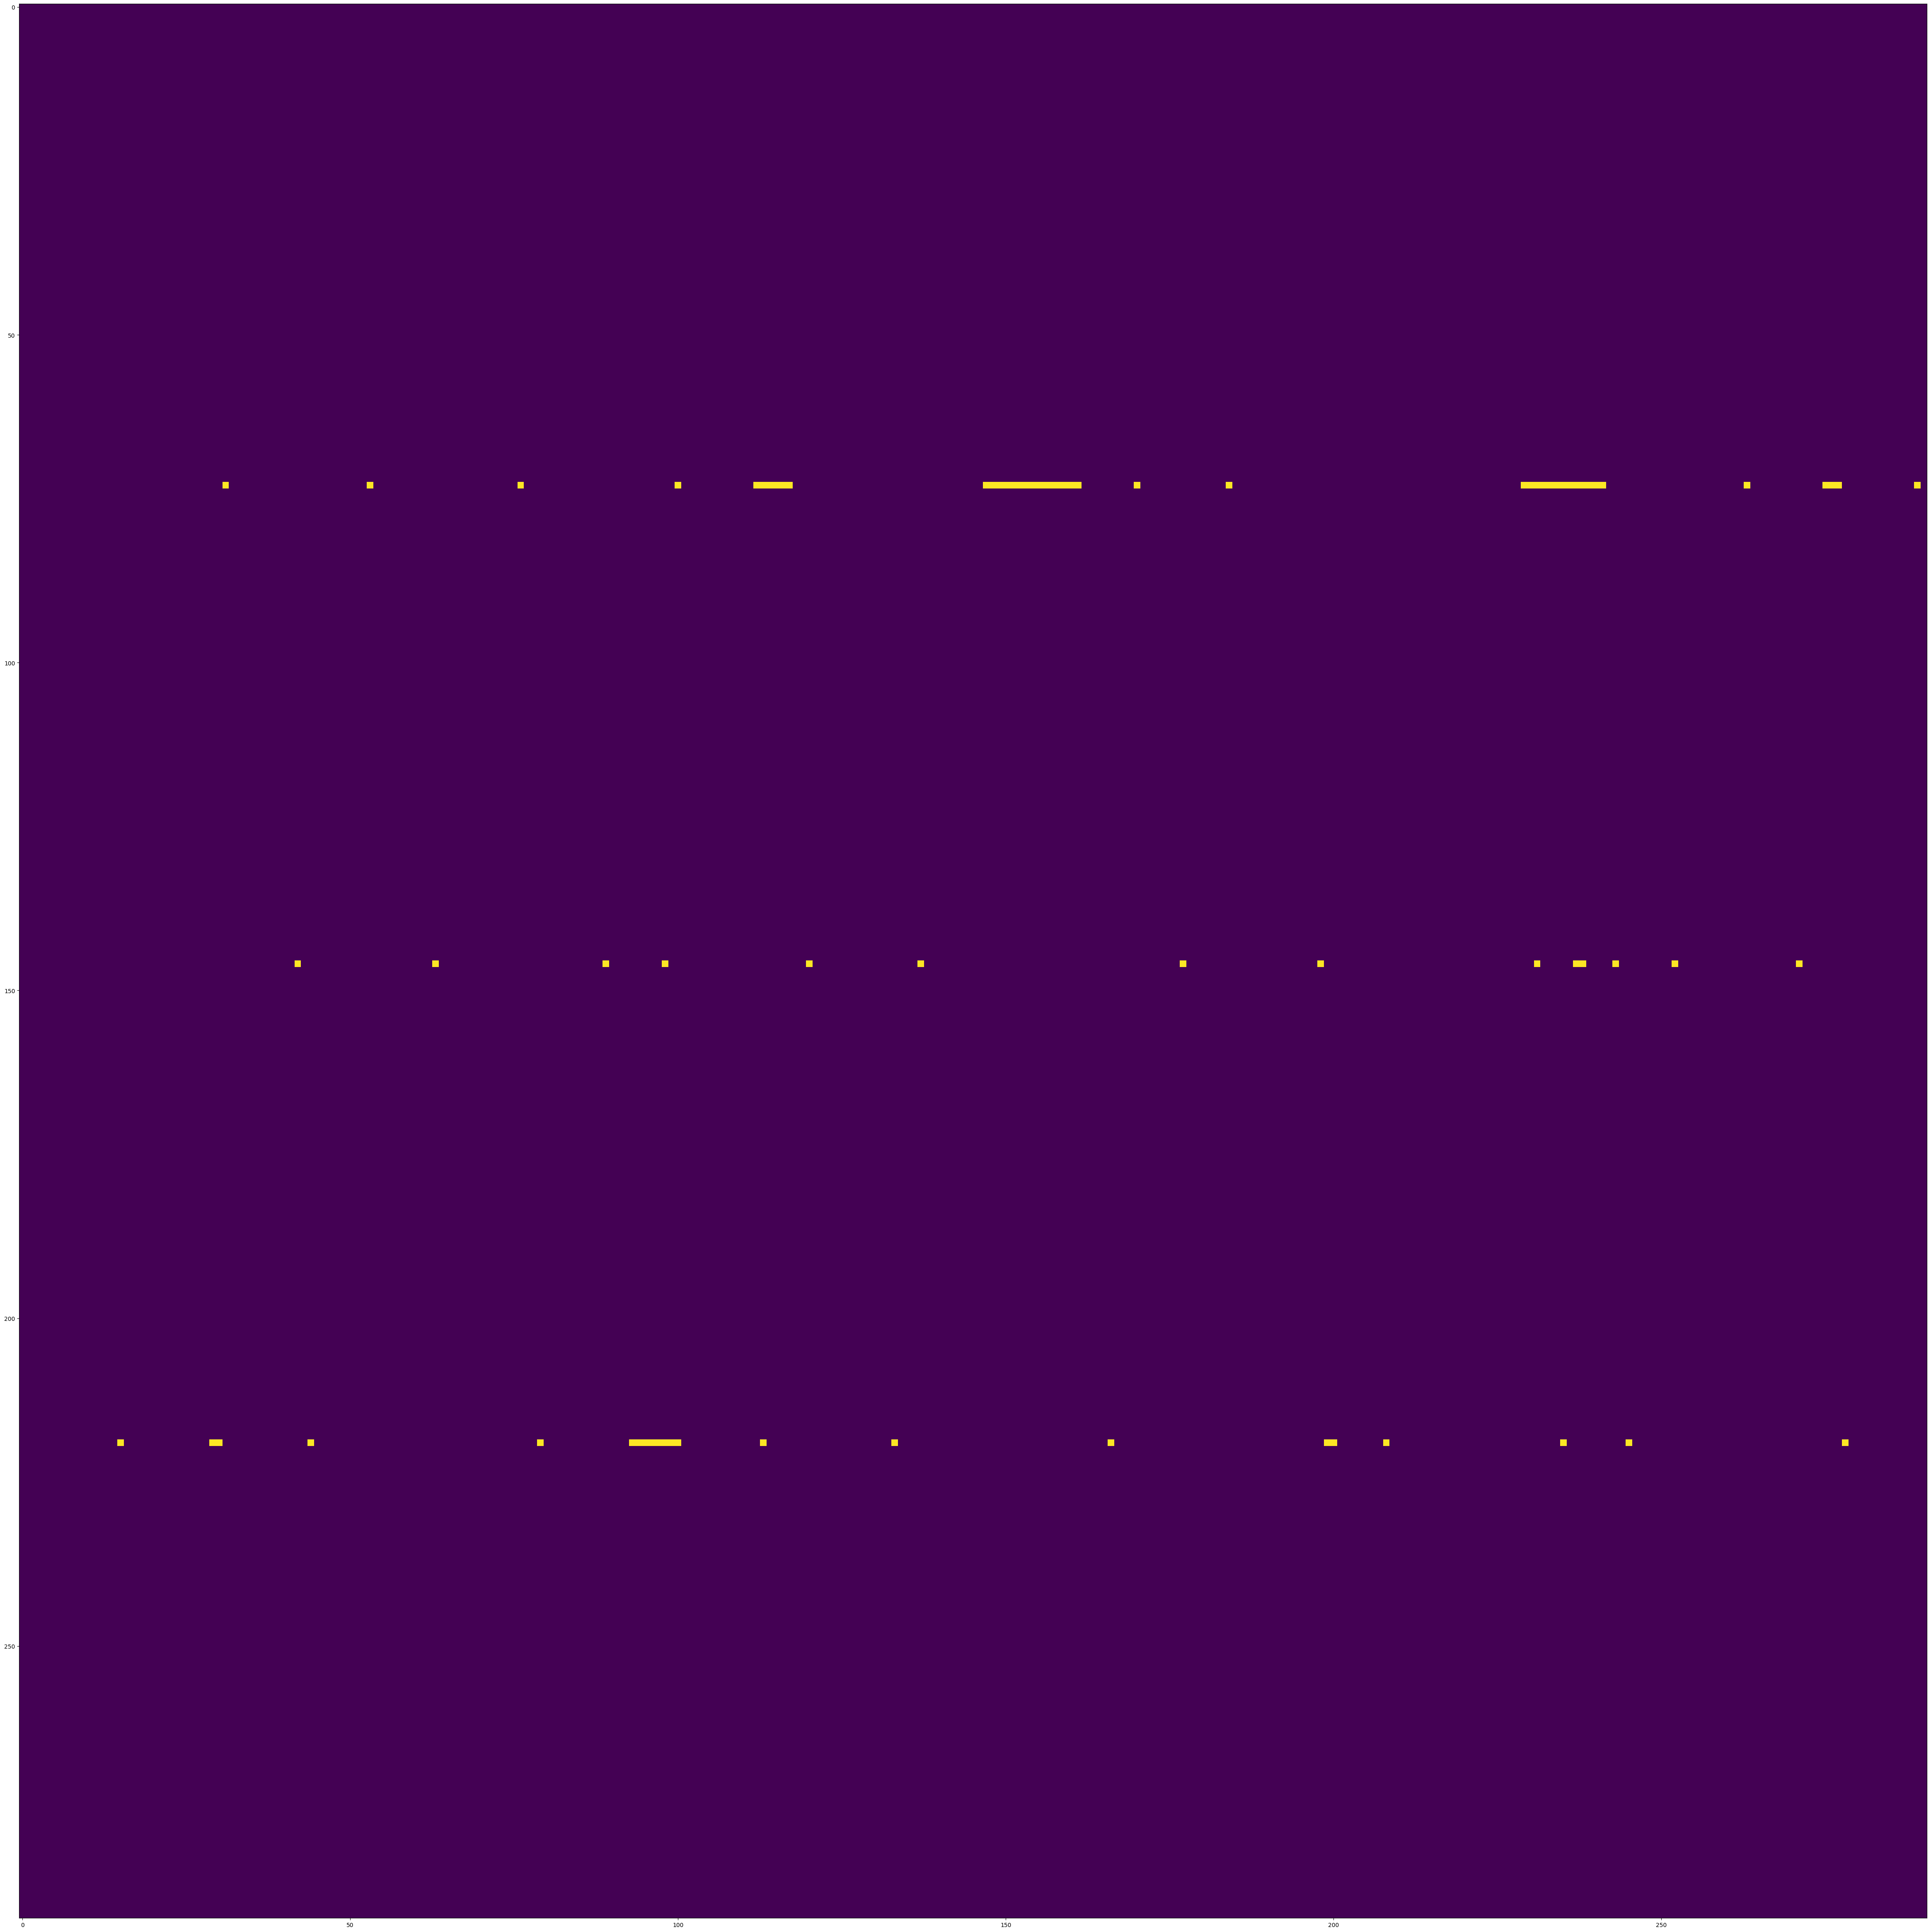

In [ ]:
# Finding the intercept points
intersection = np.logical_and(skeleton, grid)
plt.figure(figsize = (60,60))
plt.imshow(intersection)

In [ ]:
# Making list of Intercept points
label = morphology.label(intersection)
props = measure.regionprops(label)
print(type(props))
print (str(len(props)) + '  intersections')
for i in range(len(props)):
    print (props[i].centroid)

<class 'list'>
38  intersections
(73.0, 31.0)
(73.0, 53.0)
(73.0, 76.0)
(73.0, 100.0)
(73.0, 114.5)
(73.0, 154.0)
(73.0, 170.0)
(73.0, 184.0)
(73.0, 235.0)
(73.0, 263.0)
(73.0, 276.0)
(73.0, 289.0)
(146.0, 42.0)
(146.0, 63.0)
(146.0, 89.0)
(146.0, 98.0)
(146.0, 120.0)
(146.0, 137.0)
(146.0, 177.0)
(146.0, 198.0)
(146.0, 231.0)
(146.0, 237.5)
(146.0, 243.0)
(146.0, 252.0)
(146.0, 271.0)
(219.0, 15.0)
(219.0, 29.5)
(219.0, 44.0)
(219.0, 79.0)
(219.0, 96.5)
(219.0, 113.0)
(219.0, 133.0)
(219.0, 166.0)
(219.0, 199.5)
(219.0, 208.0)
(219.0, 235.0)
(219.0, 245.0)
(219.0, 278.0)


Assume 1 pixel = $1\,\mu\text{m}$

In [ ]:
# Making list of intercept lengths
length=[]
for i in range(0,len(props)-1):
  if(props[i].centroid[0]==props[i+1].centroid[0]):
    lengths=(props[i+1].centroid[1]-props[i].centroid[1])
    length.append(lengths)
print(length)
print(len(length))
print("Mean Intercept Length:"+str(np.mean(length))+"  micro-meter")

[22.0, 23.0, 24.0, 14.5, 39.5, 16.0, 14.0, 51.0, 28.0, 13.0, 13.0, 21.0, 26.0, 9.0, 22.0, 17.0, 40.0, 21.0, 33.0, 6.5, 5.5, 9.0, 19.0, 14.5, 14.5, 35.0, 17.5, 16.5, 20.0, 33.0, 33.5, 8.5, 27.0, 10.0, 33.0]
35
Mean Intercept Length:21.428571428571427  micro-meter


In [ ]:
image2 = image.copy()
for i in range(delta, image2.shape[0], delta):
    image2[i,:,:] = [255,0,0]


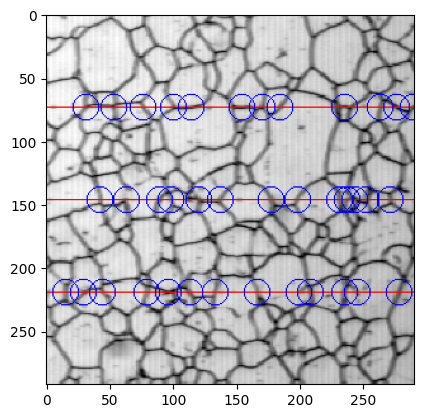

In [ ]:
# Plotting the grids and intercept points on the image
r=10
for i in range(len(props)):
    row, col = circle_perimeter(int(props[i].centroid[0]), int(props[i].centroid[1]), r)
    # Cingheck bounds before accessing array
    row_valid = (row >= 0) & (row < image2.shape[0])
    col_valid = (col >= 0) & (col < image2.shape[1])
    row = row[row_valid & col_valid]
    col = col[row_valid & col_valid]
    image2[row,col,:] = [0,0,255]


plt.imshow(image2)

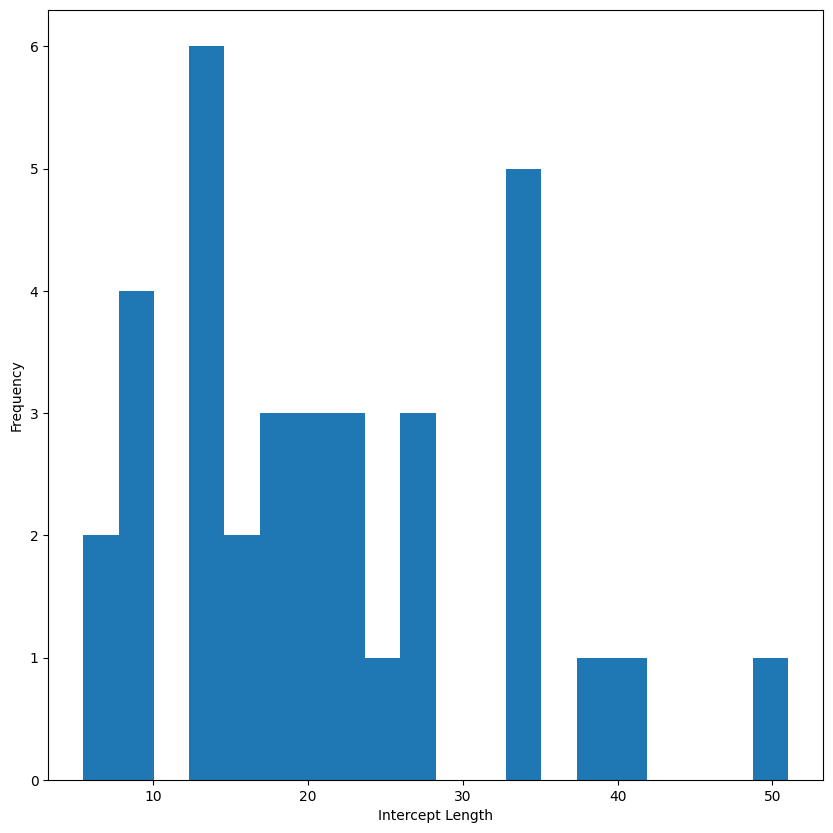

Number of intercepts: 38
Mean Intercept Length: 21.428571428571427


In [ ]:
# Ploting the histogram of the intercept lengths
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(length, bins=20)
ax.set_xlabel('Intercept Length')
ax.set_ylabel('Frequency')
plt.show()

print('Number of intercepts:', len(props))
print('Mean Intercept Length:', np.mean(length))


#Mean intercept length:
Mean Intercept Length  =  $\bar{l}$\
Total length of grid = L\
Total number of intersectoin by the line grids in the image = n\
Intersection count per unit length = $P_{L}$\
$P_{L} = \frac{n}{L}$\
$\bar{l} = \frac{1}{P_{L}}$


In [ ]:
# Calculating Mean Intercept length
n=len(props)
l=np.mean(length)
L=3*image.shape[0]
pl=n/L
print("Number of intersections: "+str(n))
print("Total length of grid: "+str(L))
print("Intersection count per unit length: "+str(pl))
l=1/pl
print("Mean intercept length: "+str(l))

Number of intersections: 38
Total length of grid: 876
Intersection count per unit length: 0.04337899543378995
Mean intercept length: 23.05263157894737


By drawing the grids we get n=38, L=876, $P_{L}$ = 0.043, $\frac{1}{P_{L}}$ = 23.052 \
From the intersection points in image, we get, $\bar{l}$ = 21.428 \
Here we can see the values of $\bar{l}$ and $P_{L}$ are almost equal.





#Surface area per unit volume of Grain Boundaries ($A_{v}$):
$A_{v} = 2P_{L}$

In [ ]:
Av=2*pl
print("Surface Area per unit volume of Grain Boundaries: "+str(Av))

Surface Area per unit volume of Grain Boundaries: 0.0867579908675799


#ASTM Grain Size Parameter (G) :

$G=-6.6439\log_{10}(\bar{l})-3.288$, where $\bar{l}$ is in mm unit.\
Assume 1 pixel = $1\,\mu\text{m}$

In [ ]:
G = -6.6439 * math.log10(l/1000) - 3.288

print("Astm Grain size parameter: "+str(G))


Astm Grain size parameter: 7.589921206592313


#Grain shape:
Calculated grain shape parameters like area, perimeter, equivalent_diameter, major_axis_length, minor_axis_length, eccentricity,orientation, using measure module.

In [ ]:

# Labelling the binary image to obtain connected components
label_img = measure.label(binary)

# Measuring properties of labeled regions
properties = measure.regionprops(label_img)

# Looping over each labeled region
for prop in properties:
    # Extracting properties of each labeled region
    area = prop.area
    perimeter = prop.perimeter
    equivalent_diameter = prop.equivalent_diameter
    major_axis_length = prop.major_axis_length
    minor_axis_length = prop.minor_axis_length
    eccentricity = prop.eccentricity
    orientation = prop.orientation

    # Printing the properties
    print(f"Area: {area:.2f}")
    print(f"Perimeter: {perimeter:.2f}")
    print(f"Equivalent Diameter: {equivalent_diameter:.2f}")
    print(f"Major Axis Length: {major_axis_length:.2f}")
    print(f"Minor Axis Length: {minor_axis_length:.2f}")
    print(f"Eccentricity: {eccentricity:.2f}")
    print(f"Orientation: {orientation:.2f}")


Area: 6.00
Perimeter: 5.62
Equivalent Diameter: 2.76
Major Axis Length: 6.18
Minor Axis Length: 1.17
Eccentricity: 0.98
Orientation: 1.04
Area: 22270.00
Perimeter: 11921.65
Equivalent Diameter: 168.39
Major Axis Length: 339.91
Minor Axis Length: 323.67
Eccentricity: 0.31
Orientation: -0.68
Area: 1.00
Perimeter: 0.00
Equivalent Diameter: 1.13
Major Axis Length: 0.00
Minor Axis Length: 0.00
Eccentricity: 0.00
Orientation: 0.79
Area: 32.00
Perimeter: 25.07
Equivalent Diameter: 6.38
Major Axis Length: 18.71
Minor Axis Length: 2.90
Eccentricity: 0.99
Orientation: -0.99
Area: 30.00
Perimeter: 20.49
Equivalent Diameter: 6.18
Major Axis Length: 8.41
Minor Axis Length: 4.91
Eccentricity: 0.81
Orientation: -1.00
Area: 1.00
Perimeter: 0.00
Equivalent Diameter: 1.13
Major Axis Length: 0.00
Minor Axis Length: 0.00
Eccentricity: 0.00
Orientation: 0.79
Area: 2.00
Perimeter: 0.00
Equivalent Diameter: 1.60
Major Axis Length: 2.00
Minor Axis Length: 0.00
Eccentricity: 1.00
Orientation: 0.00
Area: 3.00
P